In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [4]:
result = data.groupby(['MaritalDesc', 'Sex'])['Salary'].agg(['min', 'median', 'max', 'mean']).reset_index()
print(result)

  MaritalDesc Sex    min   median     max          mean
0    Divorced   F  45069  59393.0   68182  57345.500000
1    Divorced  M   45115  63738.5  148999  72520.857143
2     Married   F  45433  62662.0  250000  69638.986111
3     Married  M   46120  63370.5  157000  70089.038462
4   Separated   F  52984  60627.0   66149  60658.888889
5   Separated  M   64397  70468.0   74417  69760.666667
6      Single   F  45395  62068.0  220450  68988.266667
7      Single  M   46428  63055.5  178000  71340.048387
8     Widowed   F  45046  63303.5  107226  69719.750000
9     Widowed  M   52788  61359.0   67176  60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [5]:
# Menghitung dan menampilkan lima alasan teratas
top_5_termination_reasons = data['TermReason'].value_counts().head(5)
print(top_5_termination_reasons)


N/A-StillEmployed    207
Another position      20
unhappy               14
more money            11
career change          9
Name: TermReason, dtype: int64


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [6]:
# Hitung jumlah tertinggi karyawan yang 'Exceeds' Performance Score berdasarkan Sumber Rekrutmen
result = data[data['PerformanceScore'] == 'Exceeds']['RecruitmentSource'].value_counts().reset_index()
result.columns = ['Recruitment Source', 'Employee Count']
result = result.sort_values(by='Employee Count', ascending=False)
print(result)

   Recruitment Source  Employee Count
0              Indeed              12
1            LinkedIn               9
2  Diversity Job Fair               6
3   Employee Referral               5
4       CareerBuilder               2
5       Google Search               2
6             Website               1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [7]:
manager_count_by_department = data.groupby('Department')['ManagerName'].nunique().reset_index()
manager_count_by_department.columns = ['Department', 'Manager Count']

# Tampilkan hasil
print(manager_count_by_department)

             Department  Manager Count
0         Admin Offices              3
1      Executive Office              1
2                 IT/IS              6
3     Production                    10
4                 Sales              4
5  Software Engineering              3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [8]:
data = pd.DataFrame({
    'Sex': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
    'Termd': [0, 1, 1, 0, 0, 1, 1, 0]
})

# Hitung rasio pengakhiran berdasarkan jenis kelamin
termination_ratio_by_gender = data.groupby('Sex')['Termd'].value_counts(normalize=True).reset_index(name='Termination Ratio')

# Tampilkan hasil
print(termination_ratio_by_gender)

  Sex  Termd  Termination Ratio
0   F      0                0.5
1   F      1                0.5
2   M      0                0.5
3   M      1                0.5


# Create an EDA and Data Visualization Question

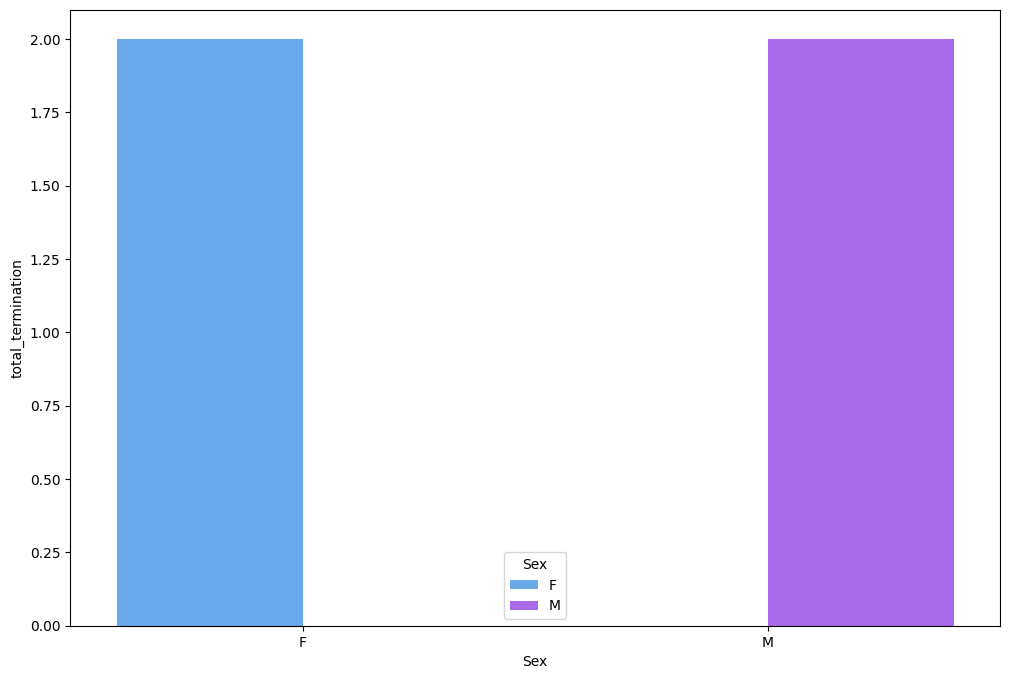

In [9]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>


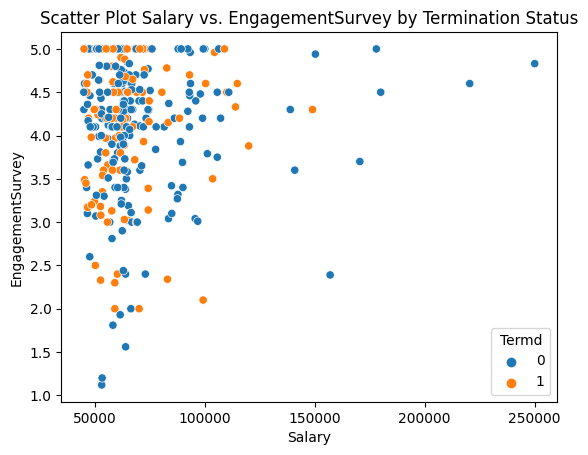

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Buat scatter plot dengan warna berdasarkan status di "Termd"
sns.scatterplot(x='Salary', y='EngagementSurvey', hue='Termd', data=data)

# Tampilkan plot
plt.title('Scatter Plot Salary vs. EngagementSurvey by Termination Status')
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

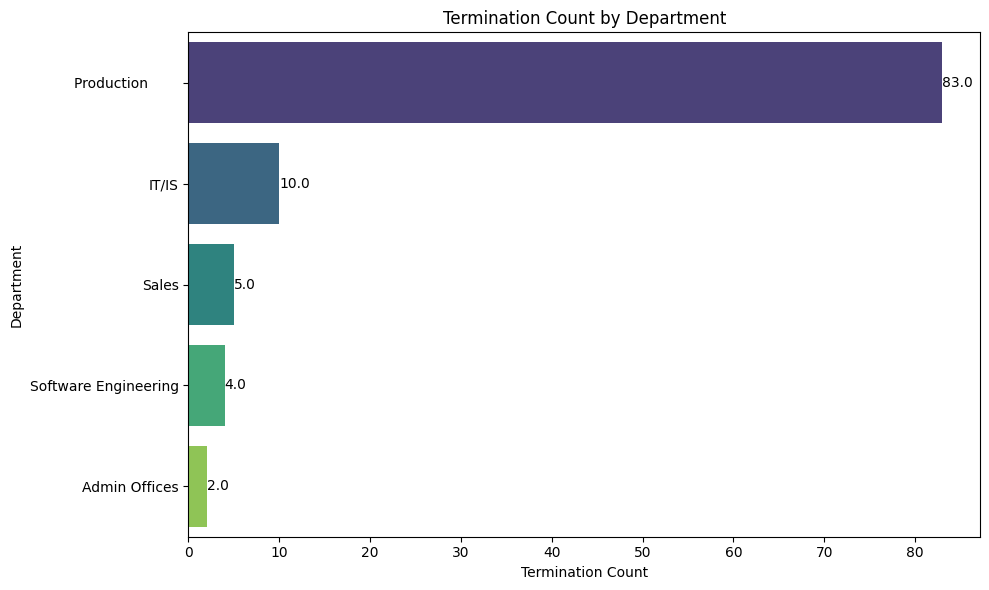

In [11]:
termination_by_department = data[data['Termd'] == 1]['Department'].value_counts().reset_index()
termination_by_department.columns = ['Department', 'Termination Count']

# Buat visualisasi bar chart
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Termination Count', y='Department', data=termination_by_department, palette='viridis')
plt.xlabel('Termination Count')
plt.ylabel('Department')
plt.title('Termination Count by Department')

# Tampilkan label jumlah pengakhiran di atas bar
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center')

# Tampilkan plot
plt.tight_layout()
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

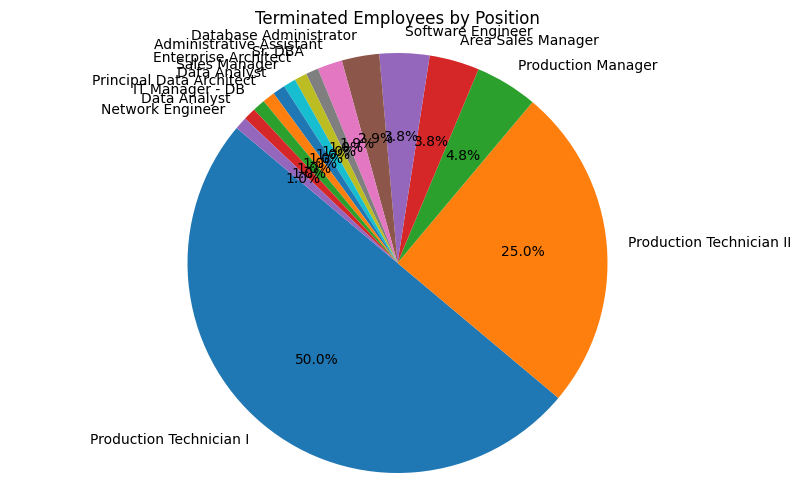

In [12]:
# Filter hanya karyawan yang di-PHK (Termd=1)
terminated_data = data[data['Termd'] == 1]

# Hitung jumlah karyawan yang di-PHK berdasarkan posisi (Position)
termination_by_position = terminated_data['Position'].value_counts()

# Buat visualisasi pie chart
plt.figure(figsize=(10, 6))
plt.pie(termination_by_position, labels=termination_by_position.index, autopct='%1.1f%%', startangle=140)
plt.title('Terminated Employees by Position')

# Tampilkan pie chart
plt.axis('equal')  # Agar pie chart berbentuk lingkaran
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

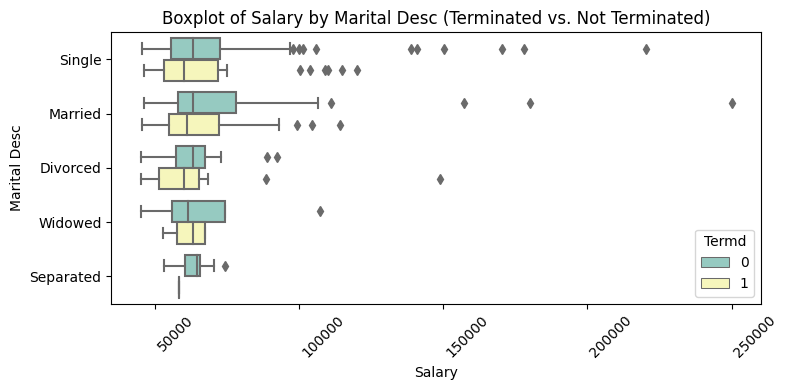

In [13]:
# Buat boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x='Salary', y='MaritalDesc', hue='Termd', data=data, palette='Set3')
plt.xlabel('Salary')
plt.ylabel('Marital Desc')
plt.title('Boxplot of Salary by Marital Desc (Terminated vs. Not Terminated)')

# Tampilkan plot
plt.xticks(rotation=45, ha='left')
plt.tight_layout()
plt.show()


10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


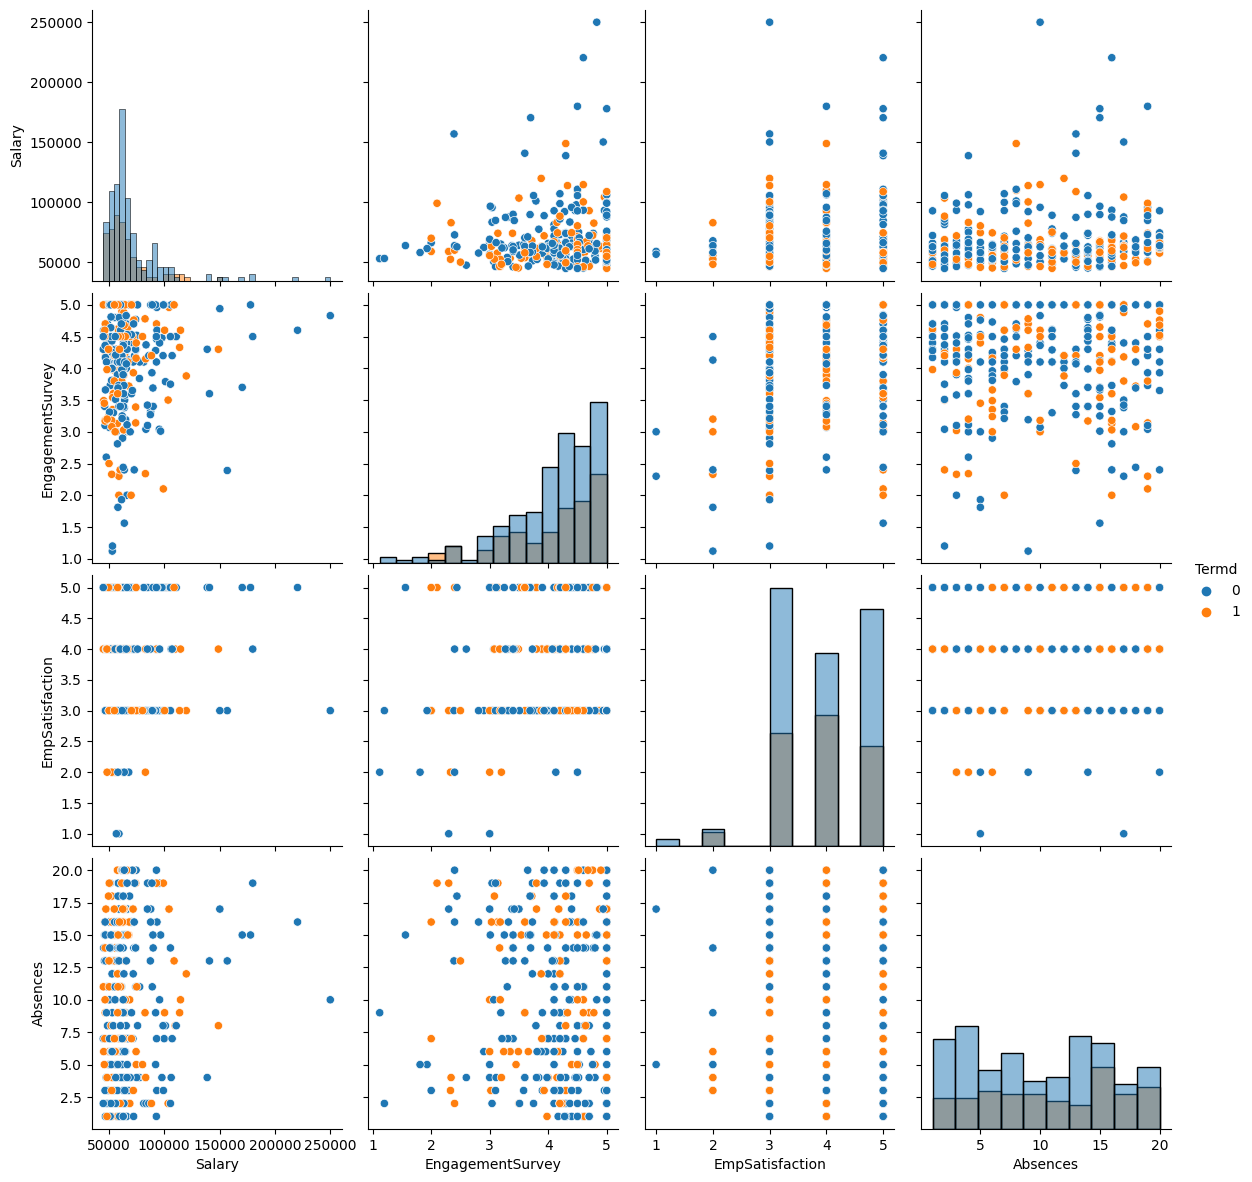

In [14]:
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [15]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
data['DOB'] = pd.to_datetime(data['DOB'])

# Buat kolom 'DOB_Date' untuk menyimpan tanggal lahir dalam format tanggal
data['DOB_Date'] = data['DOB'].dt.date

# Hitung usia (Age) dengan mengurangkan tahun lahir dari tahun 2022
data['Age'] = 2022 - data['DOB'].dt.year

# Tampilkan dataset dengan kolom 'DOB', 'DOB_Date', dan 'Age'
print(data[['DOB', 'DOB_Date', 'Age']].head())


         DOB    DOB_Date  Age
0 1983-07-10  1983-07-10   39
1 1975-05-05  1975-05-05   47
2 1988-09-19  1988-09-19   34
3 1988-09-27  1988-09-27   34
4 1989-09-08  1989-09-08   33


In [16]:
#12. Lakukan MinMaxScaler dari fitur "Salary"

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['Salary_Scaled'] = scaler.fit_transform(data[['Salary']])

print(data[['Salary', 'Salary_Scaled']].head())


   Salary  Salary_Scaled
0   62506       0.085190
1  104437       0.289777
2   64955       0.097139
3   64991       0.097315
4   50825       0.028197


In [17]:
#13. Ubahlah semua tipe data object menjadi category
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [18]:
#Setelah diubah category
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Tampilkan tipe data kolom-kolom setelah perubahan
print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                           datetime64[ns]
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [19]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengubah kolom "RecruitmentSource" dengan LabelEncoder
data['RecruitmentSource_encoded'] = label_encoder.fit_transform(data['RecruitmentSource'])

# Mengubah kolom "PerformanceScore" dengan LabelEncoder
data['PerformanceScore_encoded'] = label_encoder.fit_transform(data['PerformanceScore'])

print(data[['RecruitmentSource_encoded', 'PerformanceScore_encoded']])

     RecruitmentSource_encoded  PerformanceScore_encoded
0                            5                         0
1                            4                         1
2                            5                         1
3                            4                         1
4                            3                         1
..                         ...                       ...
306                          5                         1
307                          3                         3
308                          2                         0
309                          2                         1
310                          5                         1

[311 rows x 2 columns]


In [20]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

# Independent Variable (Feature)
X = data[['Salary', 'EngagementSurvey', 'RecruitmentSource_encoded', 'PerformanceScore_encoded']]

# Dependent Variable (Target)
y = data['Termd']

# Cetak Independent Variable (Feature)
print("Independent Variables:")
print(X)

# Cetak Dependent Variable (Target)
print("\nDependent Variable:")
print(y)


Independent Variables:
     Salary  EngagementSurvey  RecruitmentSource_encoded  \
0     62506              4.60                          5   
1    104437              4.96                          4   
2     64955              3.02                          5   
3     64991              4.84                          4   
4     50825              5.00                          3   
..      ...               ...                        ...   
306   65893              4.07                          5   
307   48513              3.20                          3   
308  220450              4.60                          2   
309   89292              5.00                          2   
310   45046              4.50                          5   

     PerformanceScore_encoded  
0                           0  
1                           1  
2                           1  
3                           1  
4                           1  
..                        ...  
306                         1  


In [27]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

# Membagi data menjadi train set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran train set dan test set
print("Train Set (X_train, y_train):", X_train.shape, y_train.shape)
print("Test Set (X_test, y_test):", X_test.shape, y_test.shape)


Train Set (X_train, y_train): (248, 4) (248,)
Test Set (X_test, y_test): (63, 4) (63,)


In [31]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)


from sklearn.metrics import accuracy_score

# Melakukan prediksi pada data pengujian
y_pred = rf_model.predict(X_test)

# Menghitung akurasi antara prediksi dan label data pengujian
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3f}%".format(accuracy * 100))


Accuracy: 65.079%


In [32]:
from sklearn.metrics import confusion_matrix as cm

confmat = cm(y_test, y_pred)
print("confusion matrix:\n{}".format(confmat))

TP = confmat[0,0]
print("True Positif (TP): {}".format(TP))

TN = confmat[1,1]
print("True Negatif (TN): {}".format(TN))

FP = confmat[0,1]
print("False Positif (FP): {}".format(FP))

FN = confmat[1,0]
print("False Negatif (FN): {}".format(FN))

confusion matrix:
[[31 10]
 [12 10]]
True Positif (TP): 31
True Negatif (TN): 10
False Positif (FP): 10
False Negatif (FN): 12


<Axes: >

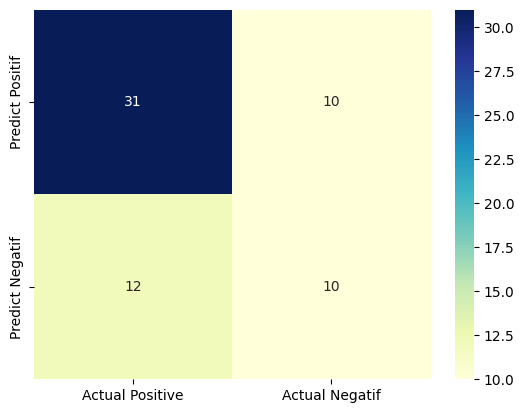

In [33]:
from seaborn import heatmap

cm_matrix = pd.DataFrame(
    data=confmat,
    columns=["Actual Positive","Actual Negatif"],
    index=["Predict Positif","Predict Negatif"]
)
heatmap(cm_matrix, annot=True, fmt='d',cmap='YlGnBu')

In [35]:
precision = TP / (TP + FP)
print("precision: {:3f}%".format(precision*100))

recall = TP / (TP + FN)
print("recall:{:3f}%".format(recall*100))

precision: 75.609756%
recall:72.093023%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

Answer:
<br>
19. Based on the data of managers and performance scores, there is data variation. In my opinion, there appears to be a relationship between these two attributes. As far as I know, to test whether there is a relationship, we can use a t-test, but I'm not very familiar with how the test works.
<br>
<br>
20. Based on the chart below, the most effective source of recruitment or the one with the lowest termination rate is "Website" because it has a lower termination ratio compared to other recruitment sources in the dataset.

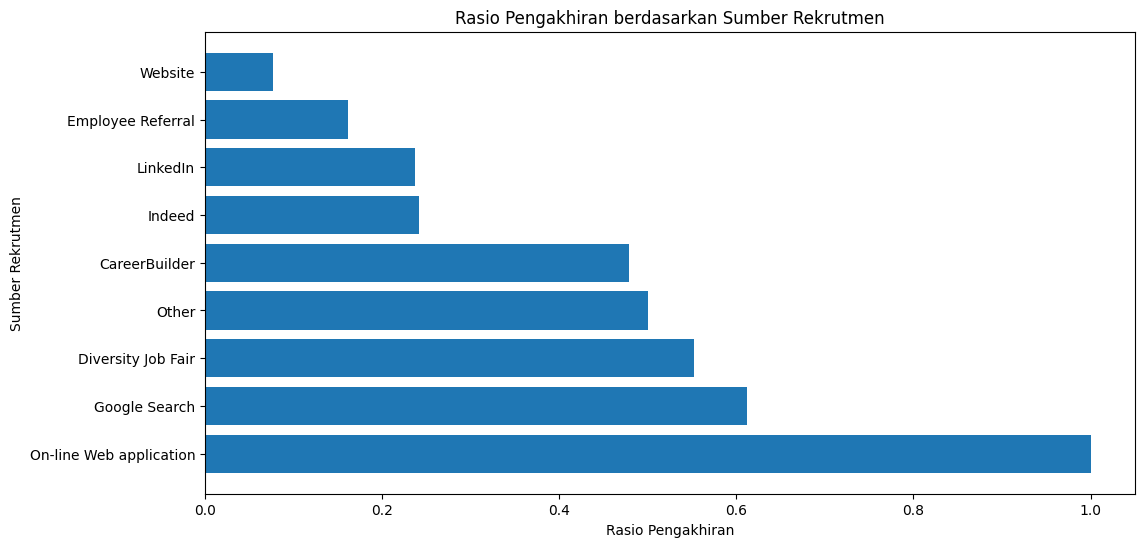

Sumber rekrutmen terbaik untuk rasio pengakhiran terendah: Website


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')

# Menghitung rasio pengakhiran berdasarkan sumber rekrutmen
termination_ratio = data.groupby('RecruitmentSource')['Termd'].mean().reset_index()

# Mengurutkan berdasarkan rasio pengakhiran dari yang terendah
termination_ratio = termination_ratio.sort_values(by='Termd')

# Menampilkan grafik bar untuk rasio pengakhiran
plt.figure(figsize=(12, 6))
plt.barh(termination_ratio['RecruitmentSource'], termination_ratio['Termd'])
plt.xlabel('Rasio Pengakhiran')
plt.ylabel('Sumber Rekrutmen')
plt.title('Rasio Pengakhiran berdasarkan Sumber Rekrutmen')
plt.gca().invert_yaxis()  # Invert agar sumber dengan rasio terendah berada di atas
plt.show()

# Menampilkan sumber rekrutmen dengan rasio pengakhiran terendah
best_recruitment_source = termination_ratio.iloc[0]['RecruitmentSource']
print(f"Sumber rekrutmen terbaik untuk rasio pengakhiran terendah: {best_recruitment_source}")
